In [60]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from math import sqrt



In [61]:
dataset = pd.read_csv('C:/Users/liping/OneDrive/文件/學校資料/碩一上/資料探勘/Hw/dataminingHW2/adult.data.csv', na_values = '?', names = ['age', 'workclass', 'fnlwgt', 'education', 
                                                                                'education-num','marital-status', 'occupation', 
                                                                                'relationship', 'race', 'sex','capital-gain', 
                                                                                'capital-loss', 'hours-per-week', 'native-country',
                                                                                'income'] )
dataset2 = pd.read_csv('C:/Users/liping/OneDrive/文件/學校資料/碩一上/資料探勘/Hw/dataminingHW2/adult.test.csv', na_values = '?', names = ['age', 'workclass', 'fnlwgt', 'education', 
                                                                                'education-num','marital-status', 'occupation', 
                                                                                'relationship', 'race', 'sex','capital-gain', 
                                                                                'capital-loss', 'hours-per-week', 'native-country',
                                                                                'income'] )

In [62]:
df = dataset
df = df.replace('?', np.NaN)
df = df.dropna()
#df
df2 = dataset2
df2 = df2.replace('?', np.NaN)
df2 = df2.dropna()
#df2

In [63]:
#資料轉換(one-hot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']]: 
    df[col] = le.fit_transform(df[col])
    
le2 = LabelEncoder()
for col in df2[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']]: 
    df2[col] = le2.fit_transform(df2[col])


In [64]:
#訓練和測試
#XY訓練資料，xy測試資料
X_train = df.drop(['hours-per-week'], axis=1) #刪除欄位
y_train = df['hours-per-week'] 
X_test = df2.drop(['hours-per-week'], axis=1)
y_test = df2['hours-per-week']

In [65]:
#正規化
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler #標準化
ss_x = StandardScaler()
ss_y = StandardScaler()
x_train = ss_x.fit_transform(X_train)
x_test = ss_x.fit_transform(X_test)


xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
xgb_re= xgboost.predict(X_test)


rmse_test_10=sqrt(metrics.mean_squared_error(y_test,xgb_re))
rmse_test_10

10.89958019732914

In [66]:
MSE = metrics.mean_squared_error(y_test, xgb_re)
#RMSE = metrics.mean_squared_error((y_test, xgb_re)**0.5
MAE = metrics.mean_absolute_error(y_test, xgb_re)
MAPE = metrics.mean_absolute_percentage_error(y_test, xgb_re)
RMSE=int(MSE)**0.5
print("RMSE:%.3f" %RMSE)
print("MAE:%.3f" %MAE)
print("MAPE:%.3f" %MAPE)

RMSE:10.863
MAE:7.442
MAPE:0.296


Feature: age, Score: 0.12
Feature: workclass, Score: 0.06
Feature: fnlwgt, Score: 0.03
Feature: education, Score: 0.03
Feature: education-num, Score: 0.05
Feature: marital-status, Score: 0.03
Feature: occupation, Score: 0.06
Feature: relationship, Score: 0.09
Feature: race, Score: 0.03
Feature: sex, Score: 0.21
Feature: capital-gain, Score: 0.03
Feature: capital-loss, Score: 0.03
Feature: native-country, Score: 0.03
Feature: income, Score: 0.20


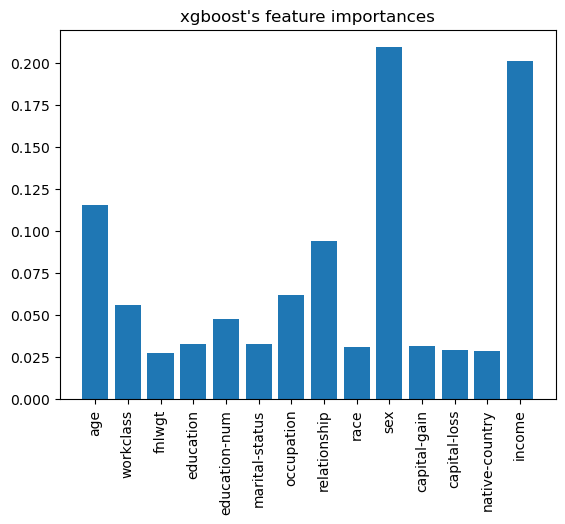

In [67]:
x_labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','native-country','income']
xgbImportance = xgboost.feature_importances_
#for i,v in enumerate(regressorImportance):
#    print('Feature: %0d, Score: %.2f' % (i,v))

for i,v in enumerate(xgbImportance):
    print('Feature: %s, Score: %.2f' % (x_labels[i],v))
    
# plot
plt.bar(range(len(xgboost.feature_importances_)), xgboost.feature_importances_)
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
x_labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','native-country','income']
plt.title('xgboost\'s feature importances')
plt.xticks(x,x_labels,rotation ='vertical')
plt.show()

In [69]:
x_train_DEL= X_train.drop(['sex','income','age'], axis=1)
x_test_DEL= X_test.drop(['sex','income','age'], axis=1)


In [70]:
#xgboost特徵刪減正規化
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler #標準化
ss_x = StandardScaler()
ss_y = StandardScaler()
X_train = ss_x.fit_transform(x_train_DEL)
X_test = ss_x.fit_transform(x_test_DEL)


xgboost = xgb.XGBRegressor()
xgboost.fit(X_train,y_train)
xgb_r= xgboost.predict(X_test)


rmse_test_10=sqrt(metrics.mean_squared_error(y_test,xgb_r))
rmse_test_10

11.281359757360859

In [71]:
MSE = metrics.mean_squared_error(y_test, xgb_r)
#RMSE = metrics.mean_squared_error((y_test, xgb_re)**0.5
MAE = metrics.mean_absolute_error(y_test, xgb_r)
MAPE = metrics.mean_absolute_percentage_error(y_test, xgb_r)
RMSE=int(MSE)**0.5
print("RMSE:%.3f" %RMSE)
print("MAE:%.3f" %MAE)
print("MAPE:%.3f" %MAPE)


RMSE:11.269
MAE:7.692
MAPE:0.326


In [48]:
# RMSE:11.32
# MAE:7.02
# MAPE:0.32 %